In [71]:
import pyuvdata
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../LWA_data_preprocessing")
import LWA_calibrate
import importlib
import casacore.tables as tbl
importlib.reload(LWA_calibrate)

<module 'LWA_calibrate' from '/opt/devel/rbyrne/rlb_LWA/notebooks/../LWA_data_preprocessing/LWA_calibrate.py'>

In [72]:
path = "/lustre/pipeline/calibration/results/2026-01-12/05h/successful/20260115_130732/tables/calibration_2026-01-12_05h.B"

In [73]:
cal = LWA_calibrate.read_caltable_safely(path)

Successful readonly open of default-locked table /lustre/pipeline/calibration/results/2026-01-12/05h/successful/20260115_130732/tables/calibration_2026-01-12_05h.B: 13 columns, 5632 rows
Successful readonly open of default-locked table /lustre/pipeline/calibration/results/2026-01-12/05h/successful/20260115_130732/tables/calibration_2026-01-12_05h.B/SPECTRAL_WINDOW: 14 columns, 16 rows


Setting telescope_location to value in known_telescopes for OVRO-LWA.
Unknown polarization basis for solutions, jones_array values may be spurious.
Unknown x_orientation basis for solutions, assuming "east".


In [30]:
cal.read("/fast/rbyrne/caltable_temp_dir/temp_spw2.B")

Setting telescope_location to value in known_telescopes for OVRO-LWA.
Unknown polarization basis for solutions, jones_array values may be spurious.
Unknown x_orientation basis for solutions, assuming "east".


In [ ]:
tb = tbl.table(path, readonly=True)
tb_spw = tbl.table(f"{path}/SPECTRAL_WINDOW", readonly=True)
chan_freq = tb_spw.getcol("CHAN_FREQ")
tb_spw.close()
tb.close()

In [12]:
cal.gain_array[np.where(cal.flag_array)] = np.nan

In [18]:
cal.freq_array

array([13398437.5    , 13422363.28125, 13446289.0625 , ...,
       86826660.15625, 86850585.9375 , 86874511.71875], shape=(3072,))

In [36]:
cal.select(frequencies=chan_freq[2,:])

In [38]:
cal.gain_array[np.where(cal.flag_array)] = np.nan

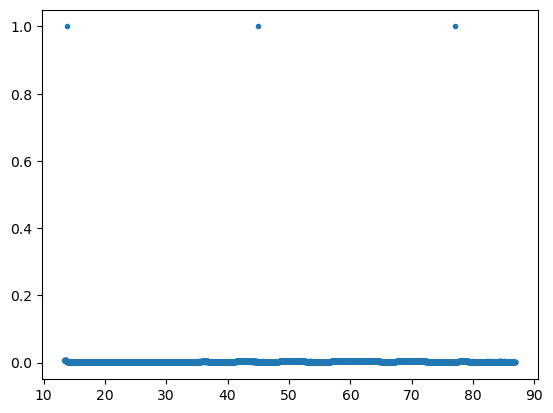

In [74]:
plt.plot(cal.freq_array/1e6, np.abs(cal.gain_array[200, :, 0, 0]), ".")
#plt.ylim([0, -1e-3])
#plt.xlim([23,27])

(23.0, 27.0)

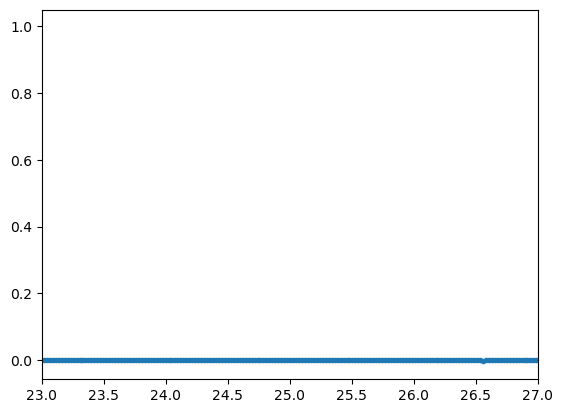

In [76]:
plt.plot(cal.freq_array / 1e6, np.real(cal.gain_array[200, :, 0, 0]), ".")
#plt.ylim([0, -1e-3])
plt.xlim([23, 27])